### Attribute Information:

* Article
* Category

The feature names are themselves pretty self-explanatory.

### Our Approach:

1. Importing the libraries
2. Loading the dataset
  * Mounting the drive
  * Reading the data file
3. Data Exploration
  * Shape of the dataset
  * News articles per category
4. Text Processing
  * Removing the non-letters
  * Tokenizing the text
  * Removing stopwords
  * Lemmatization
5. Data Transformation
  * Encoding the target variable
  * Bag of Words
  * TF-IDF
  * Train-Test Split
6. Model Training & Evaluation
  * Simple Approach
    * Naive Bayes
  * Functionalized Code
    * Decision Tree
    * Nearest Neighbors
    * Random Forest

In [2]:
# To ignore all warnings
import warnings

# For reading & manipulating the data
import pandas as pd
import numpy as np

# For visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

# To use Regular Expressions
import re

# To use Natural Language Processing
import nltk

# For tokenization
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

# To remove stopwords
from nltk.corpus import stopwords
#nltk.download('stopwords')

# For lemmetization
from nltk import WordNetLemmatizer
#nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
import category_encoders as ce

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# To perform train-test split
from sklearn.model_selection import train_test_split

# Performace Metrics for evaluating the model
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('newz-data.csv')
df.sample(10)

,Category,Article
1978,Business,venezuela reviews foreign deals venezuela is t...
1350,Entertainment,snow patrol bassist exits group snow patrol ha...
1589,Business,weak dollar hits reuters revenues at media gro...
1341,Business,georgia plans hidden asset pardon georgia is o...
1235,Business,us to probe airline travel chaos the us govern...
2186,Business,battered dollar hits another low the dollar ha...
483,Business,mixed reaction to man utd offer shares in manc...
1994,Sports,mourinho plots impressive course chelsea s win...
1766,Technology,china to overtake us net use the chinese net...
1481,Politics,tories would cut number of mps the conservat...


In [4]:
print("no. of rows: ", df.shape[0])

no. of rows:  2225


[Text(0, 0, '401')]

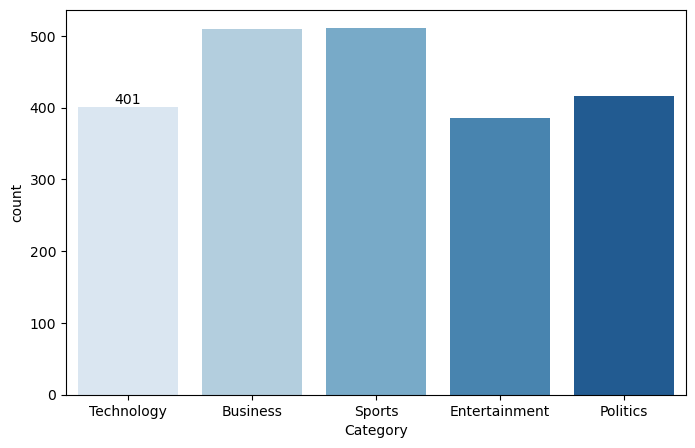

In [5]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Category', data=df, palette='Blues')
ax.bar_label(ax.containers[0])

In [6]:
df['Article'][1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [7]:
encode = ce.OrdinalEncoder(cols=['Category'])
df = encode.fit_transform(df)

In [8]:
df.sample(10)

,Category,Article
506,3,chelsea clinch cup in extra-time (after extra-...
1086,2,shares hit by ms drug suspension shares in ela...
540,2,bank holds interest rate at 4.75% the bank of ...
1437,5,police chief backs drinking move a chief const...
1135,2,mixed christmas for us retailers us retailers ...
1208,5,blair looks to election campaign tony blair s ...
982,3,dementieva prevails in hong kong elena dementi...
190,5,kinnock to urge reform in lords neil kinnock h...
331,1,cebit fever takes over hanover thousands of pr...
315,3,white prepared for battle tough-scrummaging pr...


# Let's start with TF-IDF

In [9]:
tf_idf = TfidfVectorizer()

X = tf_idf.fit_transform(df['Article']).toarray()
y = np.array(df['Category'].values)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle=True, stratify=y)

In [11]:
print("No  of rows in train:" , X_train.shape[0])
print("No  of rows in validation:" , X_val.shape[0])

No  of rows in train: 1668
No  of rows in validation: 557


In [12]:
X_train[:5]

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.0253269, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [13]:
np.unique(X_train[0], return_counts=True)

(array([0.        , 0.01245139, 0.01321266, 0.01428689, 0.01443042,
        0.01523697, 0.01536367, 0.01551315, 0.01598014, 0.0160323 ,
        0.01753061, 0.01764915, 0.01890139, 0.02061454, 0.02213004,
        0.02313443, 0.02440224, 0.02547413, 0.02729726, 0.02839282,
        0.02858475, 0.0298156 , 0.02983833, 0.0313289 , 0.03395463,
        0.03411416, 0.03421088, 0.03424328, 0.03568706, 0.0359822 ,
        0.0363613 , 0.03663374, 0.03695262, 0.03752235, 0.03778765,
        0.03783092, 0.03845305, 0.03901234, 0.03969844, 0.04016044,
        0.04079788, 0.04195842, 0.04207995, 0.04290031, 0.04329806,
        0.04343353, 0.04510821, 0.04550427, 0.04659747, 0.0482904 ,
        0.04945168, 0.04990248, 0.05013418, 0.05110688, 0.05123402,
        0.05136247, 0.05175601, 0.05393628, 0.05425826, 0.05458883,
        0.05698354, 0.05739677, 0.05760866, 0.05896225, 0.05969884,
        0.0599511 , 0.06103298, 0.06245302, 0.06256535, 0.06453554,
        0.06537394, 0.0666356 , 0.06854639, 0.06

## Simple approaches

### Multinomial Naive Bayes

In [14]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB()

In [15]:
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Train Accuracy: ", nb_train)
print("Test Accuracy: ", nb_test)

Train Accuracy:  0.986810551558753
Test Accuracy:  0.9461400359066428


In [16]:
y_pred_nb = nb.predict(X_val)
y_pred_proba_nb = nb.predict_proba(X_val)

roc_auc_score(y_val, y_pred_proba_nb, multi_class='ovr')

0.9981948830460908

In [17]:
precision = precision_score(y_val, y_pred_nb, average='weighted')
recall = recall_score(y_val, y_pred_nb, average='weighted')
f1 = f1_score(y_val, y_pred_nb, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Precision:  0.9481239538110097
Recall:  0.9461400359066428
F1 Score:  0.9451393248421434


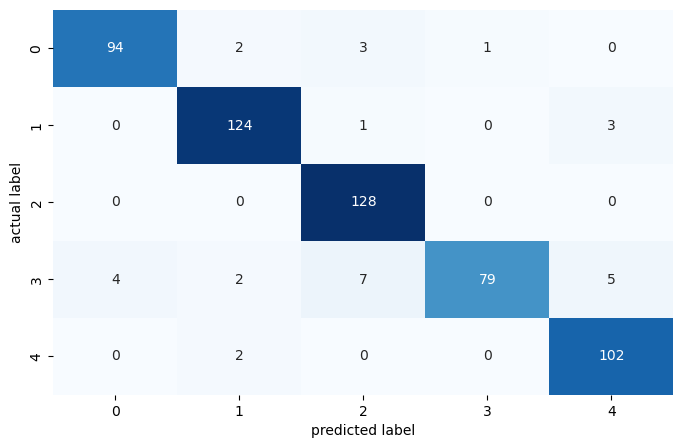

In [18]:
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')

plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.show()

In [19]:
def model_train(obj):
  obj.fit(X_train, y_train) # Training the model
  y_pred = obj.predict(X_val) # Making predictions
  y_pred_proba = obj.predict_proba(X_val)
  return y_pred, y_pred_proba


def model_eval(obj, y_pred, y_pred_proba):
    print("-------------------------")

    # Calculating the train & test accuracy
    train_acc = accuracy_score(y_train, obj.predict(X_train))
    test_acc = accuracy_score(y_val, obj.predict(X_val))

    print("Train Accuracy: {:.3f}".format(train_acc))
    print("Test Accuracy: {:.3f}\n".format(test_acc))

    # Computing the ROC AUC score
    print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_val, y_pred_proba, multi_class='ovr')))

    # Computing the precision, recall & f1 score
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format(f1))

    print("-------------------------")

### Decision Tree

In [20]:
dt = DecisionTreeClassifier()

y_pred_dt, y_pred_proba_dt = model_train(dt)

model_eval(dt, y_pred_dt, y_pred_proba_dt)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.833

ROC AUC Score: 0.893

Precision: 0.833
Recall: 0.833
F1 Score: 0.833
-------------------------


In [21]:
rf = RandomForestClassifier()

y_pred_rf, y_pred_proba_rf = model_train(rf)

model_eval(rf, y_pred_rf, y_pred_proba_rf)


-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.939

ROC AUC Score: 0.998

Precision: 0.941
Recall: 0.939
F1 Score: 0.939
-------------------------


### K nearest neighbours

In [23]:
kn = KNeighborsClassifier()

y_pred_kn, y_pred_proba_kn = model_train(kn)

model_eval(kn, y_pred_kn, y_pred_proba_kn)                          

-------------------------
Train Accuracy: 0.956
Test Accuracy: 0.935

ROC AUC Score: 0.988

Precision: 0.940
Recall: 0.935
F1 Score: 0.935
-------------------------


# BOW

In [24]:
cv = CountVectorizer(max_features = 5000)

X = cv.fit_transform(df['Article']).toarray()
y = np.array(df['Category'].values)


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, shuffle=True, stratify=y)

### Multinomial NB

In [26]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB()

In [27]:
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_test = accuracy_score(y_val, nb.predict(X_val))

print("Train accuracy: ", nb_train)
print("Test Accuracy: ", nb_test)

Train accuracy:  0.9916067146282974
Test Accuracy:  0.9730700179533214


In [28]:
dt = DecisionTreeClassifier()

y_pred_dt, y_pred_proba_dt = model_train(dt)

model_eval(dt, y_pred_dt, y_pred_proba_dt)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.804

ROC AUC Score: 0.876

Precision: 0.809
Recall: 0.804
F1 Score: 0.804
-------------------------


In [29]:
# Random Forest

rf = RandomForestClassifier()

y_pred_rf, y_pred_proba_rf = model_train(rf)

model_eval(rf, y_pred_rf, y_pred_proba_rf)

-------------------------
Train Accuracy: 1.000
Test Accuracy: 0.961

ROC AUC Score: 0.998

Precision: 0.961
Recall: 0.961
F1 Score: 0.961
-------------------------


In [30]:
# KNeighbors Classifier
kn = KNeighborsClassifier()

y_pred_kn, y_pred_proba_kn = model_train(kn)

model_eval(kn, y_pred_kn, y_pred_proba_kn) 

-------------------------
Train Accuracy: 0.839
Test Accuracy: 0.747

ROC AUC Score: 0.927

Precision: 0.761
Recall: 0.747
F1 Score: 0.743
-------------------------


# LSTM

In [86]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, GRU, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('newz-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [87]:
max_features = 5000
maxlen = 100
embedding_size = 100
batch_size = 500
epochs = 15

1. no way you're idiot
2. no way, you're idiot

In [88]:
def preprocess_text(df, text_column):
  df[text_column] = df[text_column].apply(lambda x: x.lower())
  return df

df = preprocess_text(df, 'Article')

In [89]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(df['Article'])

sequences = tokenizer.texts_to_sequences(df['Article'])
data = pad_sequences(sequences, maxlen = maxlen)

In [90]:
le = LabelEncoder()

labels = le.fit_transform(df['Category'])
labels = tf.keras.utils.to_categorical(labels)

In [91]:
labels

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state=42)


In [93]:
def load_glove_embeddings(embedding_path, embedding_dim, tokenizer, max_features):

  embeddings_index = {}

  with open(embedding_path, 'r', encoding='utf8') as f:
    for line in f:
      values = line.split()
      word = values[0]
      coefs = np.asarray(values[1:], dtype='float32')
      embeddings_index[word] = coefs


  limited_word_index = {word:index for word, index, in tokenizer.word_index.items() if index < max_features}

  embedding_matrix =  np.zeros((min(max_features + 1, len(limited_word_index) + 1), embedding_dim))


  for word, i in limited_word_index.items():
    if i > max_features:
      continue

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

  return embedding_matrix

In [94]:
embedding_matrix = load_glove_embeddings('glove.6B.100d.txt', embedding_size, tokenizer, max_features)


In [95]:
model = Sequential([
    Embedding(max_features, embedding_size, weights=[embedding_matrix],
              input_length=maxlen, trainable=False),
    LSTM(100),
    Dense(len(np.unique(df['Category'])), activation='softmax')

])

2024-12-28 09:29:07.831565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-28 09:29:07.832845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-28 09:29:07.833373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, validation_data=(X_test, y_test),
          verbose=2, callbacks=[early_stopping])

Epoch 1/10


2024-12-28 08:10:04.710381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-28 08:10:04.711443: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-28 08:10:04.711943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 - 5s - loss: 1.6197 - accuracy: 0.2404 - val_loss: 1.5955 - val_accuracy: 0.3079 - 5s/epoch - 1s/step
Epoch 2/10
4/4 - 0s - loss: 1.5703 - accuracy: 0.3258 - val_loss: 1.5563 - val_accuracy: 0.3685 - 245ms/epoch - 61ms/step
Epoch 3/10
4/4 - 0s - loss: 1.5250 - accuracy: 0.4022 - val_loss: 1.5012 - val_accuracy: 0.4247 - 203ms/epoch - 51ms/step
Epoch 4/10
4/4 - 0s - loss: 1.4613 - accuracy: 0.4927 - val_loss: 1.4024 - val_accuracy: 0.4764 - 210ms/epoch - 52ms/step
Epoch 5/10
4/4 - 0s - loss: 1.3122 - accuracy: 0.5315 - val_loss: 1.2102 - val_accuracy: 0.4764 - 207ms/epoch - 52ms/step
Epoch 6/10
4/4 - 0s - loss: 1.1773 - accuracy: 0.4708 - val_loss: 1.2081 - val_accuracy: 0.4876 - 204ms/epoch - 51ms/step
Epoch 7/10
4/4 - 0s - loss: 1.1158 - accuracy: 0.5820 - val_loss: 1.0892 - val_accuracy: 0.6022 - 205ms/epoch - 51ms/step
Epoch 8/10
4/4 - 0s - loss: 1.0123 - accuracy: 0.6556 - val_loss: 0.9933 - val_accuracy: 0.6360 - 203ms/epoch - 51ms/step
Epoch 9/10
4/4 - 0s - loss: 0.9145 - acc

### GRU

In [49]:
## GRU


# Model building
model = Sequential([
    Embedding(max_features, embedding_size, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    GRU(100),
    Dense(len(np.unique(df['Category'])), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Use EarlyStopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model training
model.fit(X_train, y_train,
batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2,
callbacks=[early_stopping])

# Evaluate

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))


Epoch 1/10


2024-12-28 08:10:11.363591: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-28 08:10:11.364327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-28 08:10:11.364778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 - 3s - loss: 1.6211 - accuracy: 0.2494 - val_loss: 1.5592 - val_accuracy: 0.2899 - 3s/epoch - 693ms/step
Epoch 2/10
4/4 - 0s - loss: 1.5247 - accuracy: 0.3466 - val_loss: 1.4728 - val_accuracy: 0.3978 - 213ms/epoch - 53ms/step
Epoch 3/10
4/4 - 0s - loss: 1.4360 - accuracy: 0.4365 - val_loss: 1.4018 - val_accuracy: 0.4517 - 187ms/epoch - 47ms/step
Epoch 4/10
4/4 - 0s - loss: 1.3687 - accuracy: 0.5039 - val_loss: 1.3417 - val_accuracy: 0.4966 - 189ms/epoch - 47ms/step
Epoch 5/10
4/4 - 0s - loss: 1.2983 - accuracy: 0.5354 - val_loss: 1.2813 - val_accuracy: 0.5281 - 185ms/epoch - 46ms/step
Epoch 6/10
4/4 - 0s - loss: 1.2317 - accuracy: 0.5640 - val_loss: 1.2162 - val_accuracy: 0.5506 - 189ms/epoch - 47ms/step
Epoch 7/10
4/4 - 0s - loss: 1.1572 - accuracy: 0.6017 - val_loss: 1.1330 - val_accuracy: 0.5843 - 201ms/epoch - 50ms/step
Epoch 8/10
4/4 - 0s - loss: 1.0610 - accuracy: 0.6348 - val_loss: 1.0252 - val_accuracy: 0.6225 - 191ms/epoch - 48ms/step
Epoch 9/10
4/4 - 0s - loss: 0.9255 - 

2024-12-28 08:10:16.037781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-12-28 08:10:16.038677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-12-28 08:10:16.039179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

14/14 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.63      0.75      0.69       101
           1       0.73      0.53      0.61        81
           2       0.57      0.58      0.57        83
           3       0.74      0.92      0.82        98
           4       0.72      0.54      0.62        82

    accuracy                           0.68       445
   macro avg       0.68      0.66      0.66       445
weighted avg       0.68      0.68      0.67       445



### SimpleRNN

In [50]:
# SimpleRNN


# Model building
model = Sequential([
    Embedding(max_features, embedding_size, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    SimpleRNN(100),
    Dense(len(np.unique(df['Category'])), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Use EarlyStopping

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Model training
model.fit(X_train, y_train,
batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=2,
callbacks=[early_stopping])

# Evaluate

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

print(classification_report(y_test_argmax, y_pred))


Epoch 1/10


2024-12-28 08:10:17.045712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 08:10:17.098741: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.
2024-12-28 08:10:27.359959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 - 11s - loss: 1.7063 - accuracy: 0.2506 - val_loss: 1.6212 - val_accuracy: 0.2764 - 11s/epoch - 3s/step
Epoch 2/10
4/4 - 10s - loss: 1.5587 - accuracy: 0.3360 - val_loss: 1.4966 - val_accuracy: 0.3528 - 10s/epoch - 2s/step
Epoch 3/10
4/4 - 10s - loss: 1.4004 - accuracy: 0.4163 - val_loss: 1.3876 - val_accuracy: 0.3955 - 10s/epoch - 2s/step
Epoch 4/10
4/4 - 10s - loss: 1.2552 - accuracy: 0.5034 - val_loss: 1.2663 - val_accuracy: 0.4494 - 10s/epoch - 2s/step
Epoch 5/10
4/4 - 10s - loss: 1.1101 - accuracy: 0.5607 - val_loss: 1.1626 - val_accuracy: 0.5079 - 10s/epoch - 2s/step
Epoch 6/10
4/4 - 10s - loss: 1.0698 - accuracy: 0.5652 - val_loss: 1.1205 - val_accuracy: 0.5236 - 10s/epoch - 2s/step
Epoch 7/10
4/4 - 10s - loss: 1.0037 - accuracy: 0.6034 - val_loss: 1.1058 - val_accuracy: 0.5416 - 10s/epoch - 2s/step
Epoch 8/10
4/4 - 10s - loss: 0.9643 - accuracy: 0.6326 - val_loss: 1.0804 - val_accuracy: 0.5326 - 10s/epoch - 2s/step
Epoch 9/10
4/4 - 10s - loss: 0.9187 - accuracy: 0.6449 - va

2024-12-28 08:11:57.662326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 5s 320ms/step
              precision    recall  f1-score   support

           0       0.55      0.64      0.59       101
           1       0.52      0.37      0.43        81
           2       0.50      0.66      0.57        83
           3       0.92      0.79      0.85        98
           4       0.50      0.45      0.47        82

    accuracy                           0.59       445
   macro avg       0.60      0.58      0.58       445
weighted avg       0.61      0.59      0.59       445



# Inference

In [51]:
def predict_category(text, tokenizer, model, label_encoder, max_len):
  text = text.lower()

  seq = tokenizer.texts_to_sequences([text])

  padded_seq = pad_sequences(seq, maxlen = max_len)

  pred = model.predict(padded_seq)

  print("output of pred: ", pred)

  pred_label_index = np.argmax(pred,axis=1)

  pred_label = label_encoder.inverse_transform(pred_label_index)

  return pred_label[0]

In [52]:
input_text = 'I love playing football in big field'

predicted_category = predict_category(input_text, tokenizer, model, le, maxlen)

print("predicted category: ", predicted_category)

1/1 [==============================] - 1s 843ms/step
output of pred:  [[0.00217702 0.1250456  0.02106843 0.8453252  0.00638374]]
predicted category:  Sports
